### si se tira una moneda 10 veces ¿cuál es la probabilidad de que salgan más de 7 caras?


In [1]:
import numpy as np
from scipy import stats as st

n, p = 10, 0.5

b = st.binom.pmf(8, n=n, p=p) + st.binom.pmf(9, n=n, p=p) + st.binom.pmf(10, n=n, p=p)

print('La probabilidad de más de 7 caras es:', b)



La probabilidad de más de 7 caras es: 0.05468749999999997


### El dueño de un negocio cree que el número medio de clientes que visitan el negocio en una hora es 4.5. El dueño modela el número de clientes que llegan a horas disjuntas como variables independientes con distribución de Poisson con media 4.5. ¿Cuál es la probabilidad de que al menos 12 clientes entren en un período de 2 horas?.

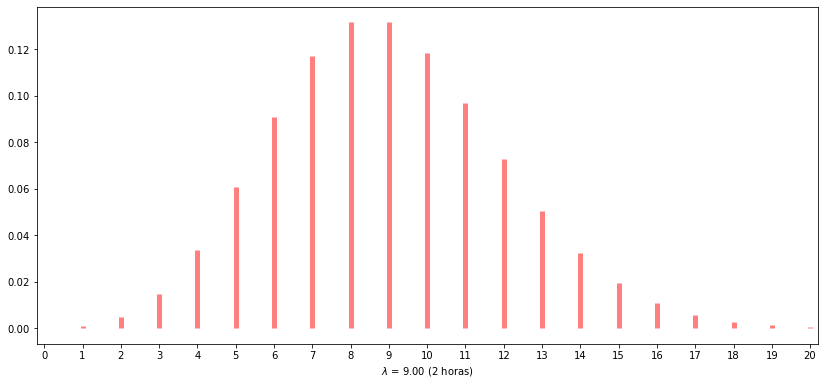

La probabilidad de que al menos 12 clientes lleguen en 2 horas es: 0.1970


In [5]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Definir los valores predeterminados
lambda_hrs = 4.5  # Media por hora (clientes)
maxim = 20  # Máximo número de clientes a considerar para el gráfico

# Calcular la media para 2 horas (lambda_2hrs)
lambda_2hrs = lambda_hrs * 2  # Media en 2 horas

# Crear el rango de valores x (número de clientes)
x = np.arange(0, int(maxim) + 1)

# Calcular la función de masa de probabilidad (PMF) de Poisson para los valores x
pmf_poisson = poisson.pmf(x, lambda_2hrs)

# Configurar el gráfico
fig, ax = plt.subplots(1, 1, figsize=(14, 6.20))

minim = 0
rango = maxim - minim
ax.set_xlim(left=minim - rango / 100, right=maxim + rango / 100)
ax.xaxis.set_ticks(range(minim, int(maxim) + 1, 1))

# Etiqueta para la media
text = "$\lambda$ = %3.2f (2 horas)" % (lambda_2hrs)
plt.xlabel(text)

# Graficar la distribución de Poisson
ax.vlines(x, 0, pmf_poisson, colors='r', lw=5, alpha=0.5)

# Mostrar el gráfico
plt.show()

# Calcular la probabilidad de que haya al menos 12 clientes en 2 horas
probabilidad_menor_12 = poisson.cdf(11, lambda_2hrs)  # P(X <= 11)
probabilidad_al_menos_12 = 1 - probabilidad_menor_12  # P(X >= 12)

# Imprimir el resultado
print(f"La probabilidad de que al menos 12 clientes lleguen en 2 horas es: {probabilidad_al_menos_12:.4f}")


###  Generar distribuciones equivalentes a partir de distribuciones aleatorias gaussianas y graficar 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


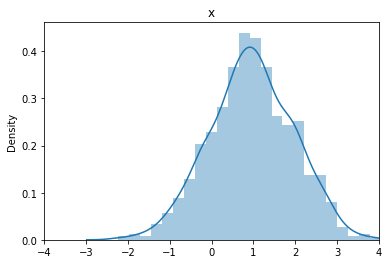

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


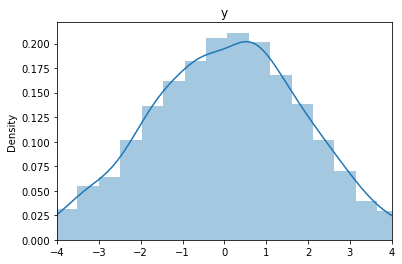

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(123)
x = np.random.normal(1, 1, 1000)
y = np.random.normal(0, 2, 1000)

sns.distplot(x)
plt.title('x')
plt.xlim(-4, 4)
plt.show()
sns.distplot(y)
plt.title('y')
plt.xlim(-4, 4)
plt.show()


### Convergencia del Teorema Central del Límite para una distribución del valor de la media de N variables aleatorias de una distribución uniforme con µ = 0.5 y σ = 1.


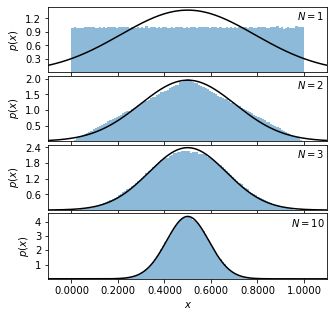

In [8]:
# https://www.astroml.org/book_figures/chapter3/fig_central_limit.html
# Autor: Jake VanderPlas
# Licencia: BSD
#   La figura producida por este código está publicada en el libro
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   Para más información, consulta http://www.astroml.org/
#   Para reportar un error o problema, utiliza el siguiente foro:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# Generar las muestras uniformes
N = [1, 2, 3, 10]

np.random.seed(42)
x = np.random.random((max(N), int(1E6)))

#------------------------------------------------------------
# Graficar los resultados
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(4, 1, i + 1)

    # tomar la media de las primeras N[i] muestras
    x_i = x[:N[i], :].mean(0)
    ## Cortamos x como x[start:end:step], que es la forma completa.
    ## Aquí podemos omitir el uso de un valor por defecto: el inicio por defecto es 0, 
    ## el final por defecto es la longitud de la lista, y el paso por defecto es 1.
    ## Por lo tanto, x[:] significa lo mismo que x[0:len(x):1]

    # generar el histograma de los datos
    ax.hist(x_i, bins=np.linspace(0, 1, 111),
            histtype='stepfilled', alpha=0.5, density=True)

    # graficar la pdf gaussiana esperada
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()


### Estime el valor de π por el método Monte Carlo 

In [9]:
import numpy as np
import math


n = 100000

nr = 0

for i in range(n):
	x = np.random.random()
	y = np.random.random()
	r = math.sqrt(x*x + y*y)
	
	if r < 1:
		nr += 1

mc_pi = 4*nr/n 

print("El valor de pi es = ", mc_pi)

El valor de pi es =  3.13804
